In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
! kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:04<00:00, 147MB/s]
100% 1.06G/1.06G [00:05<00:00, 228MB/s]


In [3]:
# unzip the dataset
! unzip dogs-vs-cats.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/dogs/dog.4419.jpg  
  inflating: train/dogs/dog.442.jpg  
  inflating: train/dogs/dog.4420.jpg  
  inflating: train/dogs/dog.4421.jpg  
  inflating: train/dogs/dog.4422.jpg  
  inflating: train/dogs/dog.4424.jpg  
  inflating: train/dogs/dog.4425.jpg  
  inflating: train/dogs/dog.4426.jpg  
  inflating: train/dogs/dog.4427.jpg  
  inflating: train/dogs/dog.4431.jpg  
  inflating: train/dogs/dog.4433.jpg  
  inflating: train/dogs/dog.4436.jpg  
  inflating: train/dogs/dog.4438.jpg  
  inflating: train/dogs/dog.4439.jpg  
  inflating: train/dogs/dog.444.jpg  
  inflating: train/dogs/dog.4440.jpg  
  inflating: train/dogs/dog.4441.jpg  
  inflating: train/dogs/dog.4442.jpg  
  inflating: train/dogs/dog.4443.jpg  
  inflating: train/dogs/dog.4444.jpg  
  inflating: train/dogs/dog.4445.jpg  
  inflating: train/dogs/dog.4446.jpg  
  inflating: train/dogs/dog.445.jpg  
  inflating: train/dogs/dog.4450.jpg  
  inflating: tra

In [4]:
# import all importnant libries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout


In [5]:
# Image data loading/ genearators
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 20000 files belonging to 2 classes.


In [6]:
# Image data loading
test_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256, 256)
)

Found 5000 files belonging to 2 classes.


In [7]:
# Normalize the dataset
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label


In [8]:
train_ds=train_ds.map(process)
test_ds=test_ds.map(process)

In [9]:

# Create CNN Model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │      14,745,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [12]:
model.fit(train_ds,epochs=10,validation_data=test_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 67s 87ms/step - accuracy: 0.5694 - loss: 2.4370 - val_accuracy: 0.6218 - val_loss: 0.6579
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 81ms/step - accuracy: 0.6835 - loss: 0.5985 - val_accuracy: 0.7176 - val_loss: 0.5478
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 50s 80ms/step - accuracy: 0.7680 - loss: 0.4935 - val_accuracy: 0.7554 - val_loss: 0.4943
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 82ms/step - accuracy: 0.7999 - loss: 0.4328 - val_accuracy: 0.7998 - val_loss: 0.4431
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 96ms/step - accuracy: 0.8382 - loss: 0.3647 - val_accuracy: 0.7698 - val_loss: 0.5302
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 101ms/step - accuracy: 0.8733 - loss: 0.2997 - val_accuracy: 0.7744 - val_loss: 0.5006
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 82ms/step - accuracy: 0.9090 - loss: 0.2226 - val_accuracy: 0.8188 - val_loss: 0.4859
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 89ms/step - accuracy: 0.9383 - loss: 0.1667 -

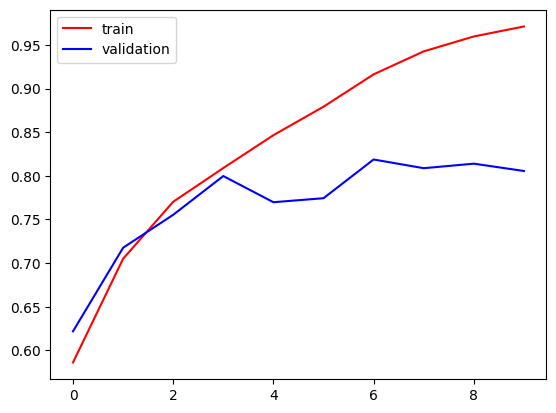

In [13]:
import matplotlib.pyplot as plt
# graph plot training accuracy and validation accuracy
plt.plot(model.history.history['accuracy'],color='red',label='train')
plt.plot(model.history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

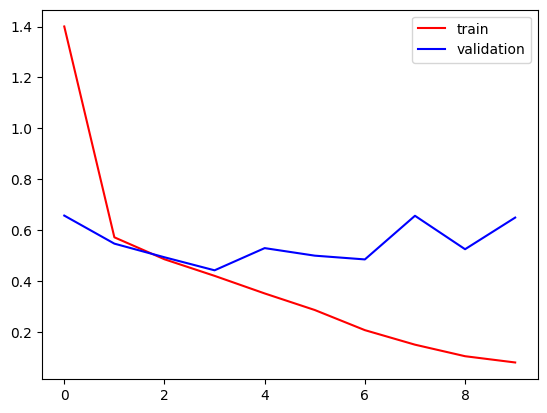

In [14]:
# loss graph
plt.plot(model.history.history['loss'],color='red',label='train')
plt.plot(model.history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [ ]:
# Ways to reduce overfitting
# Add more data
# Data Augmentation
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce Complexity


In [ ]:
# Dropout


## Test on new Data

In [15]:
import cv2

In [16]:
test_img=cv2.imread('/content/dog.jpg')

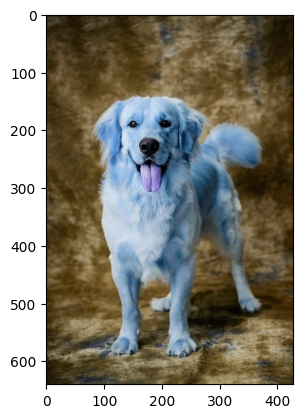

In [17]:
plt.imshow(test_img)

In [18]:
test_img.shape

(640, 427, 3)

In [19]:
test_img=cv2.resize(test_img,(256,256))

In [20]:
test_input=test_img.reshape((1,256,256,3))

In [21]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 944ms/step


array([[1.]], dtype=float32)

In [22]:
test_img=cv2.imread('/content/cat.jpg')

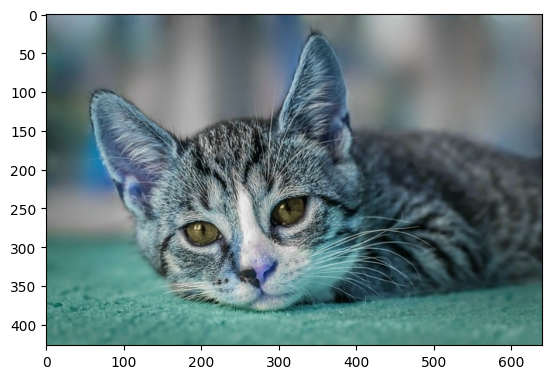

In [23]:
plt.imshow(test_img)

In [24]:
test_img.shape

(427, 640, 3)

In [25]:
test_img=cv2.resize(test_img,(256,256))

In [26]:
test_input=test_img.reshape((1,256,256,3))

In [27]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


array([[1.]], dtype=float32)